# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [54]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [55]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


Utilizaremos un target en base a la siguiente funcion, solo para obtener un target cualquiera en base a alguna relacion

$$
target = f(x,z) = 2x - 3z + 5 + noise
$$

### Generate the targets we will aim at

In [56]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

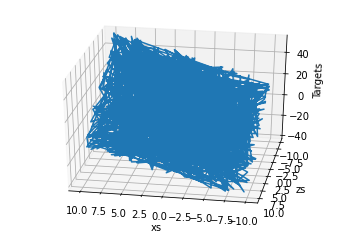

In [57]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

$$
y = xw + b
$$

- y: target
- w: varia, 2 variables (2,1)
- b: varia, 1 variable (1,1)

### Initialize variables

In [58]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1 # Voy a inicializar el w y b, en una escala entre -0.1 y 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.0340203 ]
 [-0.00509453]]
[0.01433391]


### Set a learning rate

In [59]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

## L2-norm loss formula:

$$
\sum_{i}(y_{i} - t_{i})^{2}
$$

## Gradient Descent formula:

### weights
$$
w_{i+1} = w_{i} - \eta \sum_{i} x_{i}\delta_{i}
$$

- n: learning_rate
- x: valores 
- 6: deltas, obtengo al caluclar el coste

(les puse estos simbolos porque no puedo replicar el eta y el delta)

### baises
$$
b_{i+1} = b_{i} - \eta \sum_{i} \delta_{i}
$$


### Train the model

In [61]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (2):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
    
    for j in range(200):
        print(deltas[j], "=", outputs[j], " - ", targets[j])
    # Usaremos L2-norm -> loss/2
    # Dividimos por 2 para el GD, solo para mostrarlo
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / observations
    
    #print(weights)
    #print(biases)
    # Gradiante descendente
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    #  2x1    2x1       scalar         (inputs)1000x2   1000x1
    #                                       (T)2x1000
    
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

[-4.6210741] = [-6.43884318]  -  [-1.81776908]
[-3.08208411] = [-15.94837493]  -  [-12.86629083]
[-4.51048559] = [0.13049384]  -  [4.64097943]
[-2.74347718] = [-7.43419638]  -  [-4.6907192]
[-3.1434755] = [-3.80522127]  -  [-0.66174577]
[-3.8657779] = [-8.97473582]  -  [-5.10895792]
[-6.13409326] = [7.02505064]  -  [13.1591439]
[-0.24605105] = [-30.90360038]  -  [-30.65754933]
[-4.48424009] = [-0.15472899]  -  [4.3295111]
[-3.71847152] = [-3.95397797]  -  [-0.23550645]
[-3.71786576] = [-8.02388959]  -  [-4.30602383]
[-2.52416737] = [-16.32673652]  -  [-13.80256915]
[-7.27036757] = [11.39889782]  -  [18.66926539]
[-5.85643006] = [10.44641837]  -  [16.30284843]
[-3.60897025] = [-13.16584522]  -  [-9.55687497]
[-4.6890394] = [-7.48529607]  -  [-2.79625667]
[-0.57199568] = [-32.09237264]  -  [-31.52037696]
[-6.24167846] = [3.66939381]  -  [9.91107227]
[-8.26779984] = [30.50735815]  -  [38.77515799]
[-4.32282031] = [-2.63265115]  -  [1.69016916]
[-3.58608376] = [-9.21581872]  -  [-5.6297349

[-5.10171583] = [0.68818037]  -  [5.7898962]
[-6.89672457] = [42.37930344]  -  [49.27602801]
[-3.22550967] = [-32.44773301]  -  [-29.22222334]
[-4.68179515] = [19.87360006]  -  [24.55539521]
[-5.36434886] = [-2.26423387]  -  [3.10011499]
[-3.87526695] = [-28.51954089]  -  [-24.64427395]
[-4.23455054] = [-21.20742306]  -  [-16.97287252]
[-4.69797573] = [17.99796488]  -  [22.69594061]
[-5.0988826] = [9.08885136]  -  [14.18773396]
[-7.01503936] = [33.89619333]  -  [40.9112327]
[-4.80570409] = [7.11799571]  -  [11.9236998]
[-4.63405869] = [0.54246791]  -  [5.1765266]
[-3.78936351] = [0.50279064]  -  [4.29215415]
[-4.26692084] = [0.20776823]  -  [4.47468907]
[-5.2103379] = [16.17520714]  -  [21.38554504]
[-3.8912211] = [-15.83832022]  -  [-11.94709912]
[-5.15027586] = [2.08422587]  -  [7.23450173]
[-5.90158999] = [33.98038872]  -  [39.88197871]
[-2.56601005] = [-24.70529829]  -  [-22.13928824]
[-5.51424617] = [34.29250078]  -  [39.80674695]
[-4.93538233] = [-4.47350524]  -  [0.46187709]
[-2

### Print weights and biases and see if we have worked correctly.

### Original

$$
target = f(x,z) = 2x - 3z + 5 + noise
$$

### Predecido
$$
target = f(x,z) = 1.9909x -2.9901z + 4.4339 + noise
$$

In [41]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 1.99097597]
 [-2.99010824]] [4.43396307]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

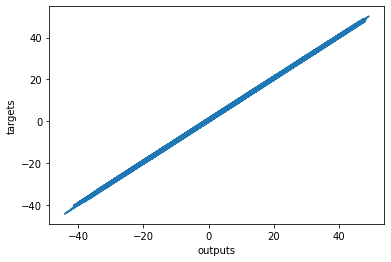

In [42]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()